<a href="https://colab.research.google.com/github/CourtneyBrookes/Fall2023/blob/main/ProblemSet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 1

In [56]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
!pip install wandb
import wandb as wb
from skimage.io import imread

In [57]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [58]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [59]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [60]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [61]:
# #MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [62]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [63]:
x = X[3,0,:,:]

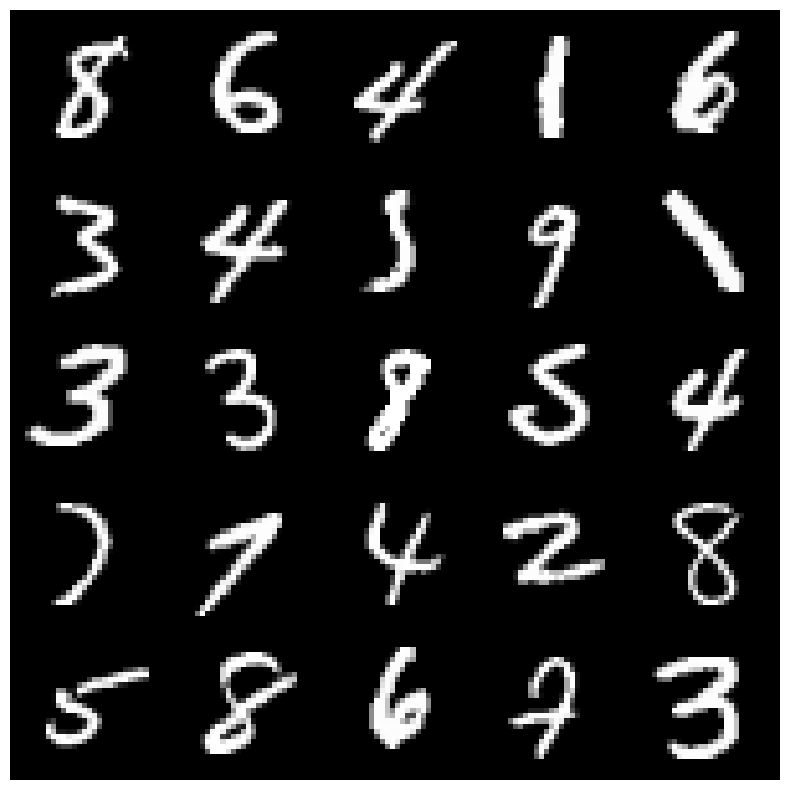

In [64]:
montage_plot(X[125:150,0,:,:])

#Run random y=mx model on MNIST

##Train random walk model to at least 75%

In [65]:
import torch
import numpy as np
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [66]:
def plot(x,title=None):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.title(title)
    plt.show()

In [67]:
##MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [68]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [74]:
x = x[:,None]

In [76]:
m = np.random.standard_normal((10,784))

In [78]:
y = m@x # @ mean matmul

In [79]:
y = np.matmul(m,x)

In [81]:
X.shape[2]*X.shape[3]

784

In [82]:
X = np.reshape(X, (X.shape[0],X.shape[2]*X.shape[3]))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[2]*X_test.shape[3]))

In [86]:
x = x.T

In [87]:
m.shape,x.shape

((10, 784), (784, 2))

In [88]:
y = m@x

In [90]:
y = np.argmax(y, axis=0)

In [93]:
X = X.T

In [94]:
X_test = X_test.T

In [96]:
y = m@X

In [98]:
y = np.argmax(y, axis=0)

In [99]:
y_ans = Y

In [100]:
acc = np.sum(y == y_ans)/len(Y)

In [101]:
m = np.random.standard_normal((10,784))

y = m@X

y = np.argmax(y, axis=0)

acc = np.sum(y == y_ans)/len(Y)

print(acc)

0.14295


In [102]:
m_best = 0
acc_best = 0

for i in range(1000):

    m = 0.1*np.random.standard_normal((10,784))

    y = m@X

    y = np.argmax(y, axis=0)

    acc = np.sum(y == y_ans)/len(Y)


    if acc > acc_best:
        print(acc)
        m_best = m
        acc_best = acc

0.1136
0.13021666666666668
0.14085
0.14726666666666666
0.15291666666666667
0.16061666666666666
0.16146666666666668
0.1728
0.18823333333333334


In [103]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [104]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

RuntimeError: ignored

In [ ]:
# def scale(img):
#     img_min = torch.min(img)
#     img_max = torch.max(img)
#     scaled = (img - img_min) / (img_max - img_min) * 1.0
#     return scaled

In [ ]:
# X = scale(X)
# X_test = scale(X_test)

In [105]:
m_best = 0
acc_best = 0

for i in range(100000):

    step = 0.0000000001

    m_random = GPU_data(np.random.randn(10,784))

    m = m_best  + step*m_random

    y = m@X

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)


    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc

RuntimeError: ignored